<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793146/blob/main/ActividadSemanal4_Equipo62.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Semanal -- 4
# Ciencia y analítica de Datos
## Equipo 62

## **Ricardo Morales Bustillos - A01740032**
## **Alejandro Jesús Vázquez Navarro - A01793146**


# Parte 1
## Ejercicio guiado


In [ ]:
# Importo las librerías que necesitaré para la extracción, transformación y limpieza de datos (si aplica)

import pandas as pd
import numpy as np

# Agrego este valor para no truncar los resultados:
pd.set_option('display.max_colwidth', None)


In [ ]:
# Realizo la adquisición de datos:
inPath = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
dfPCA = pd.read_csv(inPath, index_col = 0)

#Verifico que estén correctamente bajados

dfPCA.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [ ]:
# Realizo la asignación de cabeceras:

# Asignación de cabeceras de acuerdo a la información proporcionada:

#X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
#X2: Gender (1 = male; 2 = female). 
#X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
#X4: Marital status (1 = married; 2 = single; 3 = others). 
#X5: Age (year). 
#X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
#X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
#X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

# Creo un diccionario con los nombres de las columnas
col_dictionary = {'X1':'given_credit', 
                  'X2': 'gender', 
                  'X3': 'education', 
                  'X4': 'marital_status', 
                  'X5': 'age', 
                  'X6':'sep05_repayment',
                  'X7':'aug05_repayment',
                  'X8':'jul05_repayment',
                  'X9':'jun05_repayment',
                  'X10':'may05_repayment',
                  'X11':'abr05_repayment',
                  'X12': 'sep05_bill_statement',
                  'X13': 'aug05_bill_statement',
                  'X14': 'jul05_bill_statement',
                  'X15': 'jun05_bill_statement',
                  'X16': 'may05_bill_statement',
                  'X17': 'abr05_bill_statement',
                  'X18': 'sep05_previous_payment',
                  'X19': 'aug05_previous_payment',
                  'X20': 'jul05_previous_payment',
                  'X21': 'jun05_previous_payment',
                  'X22': 'mayu05_previous_payment',
                  'X23': 'abr05_previous_payment'                  
                  }

# Renombro las columnas para tener un mejor entendimiento del dataset
dfPCA.rename(columns = col_dictionary , inplace=True)

dfPCA.head()
#df.columns


,given_credit,gender,education,marital_status,age,sep05_repayment,aug05_repayment,jul05_repayment,jun05_repayment,may05_repayment,...,jun05_bill_statement,may05_bill_statement,abr05_bill_statement,sep05_previous_payment,aug05_previous_payment,jul05_previous_payment,jun05_previous_payment,mayu05_previous_payment,abr05_previous_payment,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


### **Paso 1:**
    - Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos
    
    * Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

In [ ]:
# Para este paso utilizaré matplotlib, numpy y PCA de sklearn decomposition

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Tengo 23 variables (incluyendo una dependiente Y que significa si el cliente cayó en default o no)

In [ ]:
# Antes de comenzar debo eliminar las variables y para ello me basaré en el ejercicio anterior:
# Esto es solo una sencilla validación:

dfPCA.isna().any()

# Tenemos nullos en casi todas las columnas excepto given_credit


given_credit               False
gender                      True
education                   True
marital_status              True
age                         True
sep05_repayment             True
aug05_repayment             True
jul05_repayment             True
jun05_repayment             True
may05_repayment             True
abr05_repayment             True
sep05_bill_statement        True
aug05_bill_statement        True
jul05_bill_statement        True
jun05_bill_statement        True
may05_bill_statement        True
abr05_bill_statement        True
sep05_previous_payment      True
aug05_previous_payment      True
jul05_previous_payment      True
jun05_previous_payment      True
mayu05_previous_payment     True
abr05_previous_payment      True
Y                           True
dtype: bool

In [ ]:
# Tengo variables categóricas como gender, education y marital_status, podría pasarles un one hot encoding 
# pero no es el objetivo de este ejercicio, así que las eliminaré del dataframe

dfOriginal = dfPCA
dfPCA = dfPCA.loc[:, ~dfPCA.columns.isin(['gender', 'education', 'marital_status', 'Y'])]


In [ ]:
dfPCA.dropna(inplace=True)
print(f'Longitud del dataframe {len(dfPCA)}')

# El dataframe tiene 30k registros, se perdieron solamente 2. 
# No haré una análisis de missing data porque esto fue parte de la tarea anterior



Longitud del dataframe 29958


C:\Users\aleja\AppData\Local\Temp\ipykernel_30632\2450569021.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPCA.dropna(inplace=True)


In [ ]:
dfPCA.head()

,given_credit,age,sep05_repayment,aug05_repayment,jul05_repayment,jun05_repayment,may05_repayment,abr05_repayment,sep05_bill_statement,aug05_bill_statement,jul05_bill_statement,jun05_bill_statement,may05_bill_statement,abr05_bill_statement,sep05_previous_payment,aug05_previous_payment,jul05_previous_payment,jun05_previous_payment,mayu05_previous_payment,abr05_previous_payment
ID,,,,,,,,,,,,,,,,,,,,
1,20000,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [ ]:
# Comencemos con un tratamiento desde cero considerando todas las variables:
pcs = PCA(n_components=20)

pcs.fit(dfPCA)


pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance':pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary.round(4)

,Standard deviation,Proportion of variance,Cumulative proportion
0,166585.0753,0.6106,0.6106
1,115824.7017,0.2952,0.9057
2,37256.8166,0.0305,0.9363
3,27747.1030,0.0169,0.9532
4,20698.6823,0.0094,0.9626
5,20278.0072,0.0090,0.9717
6,18520.7019,0.0075,0.9792
7,17040.2350,0.0064,0.9856
8,16294.1101,0.0058,0.9915
9,11615.2249,0.0030,0.9944


In [ ]:
# Hagamos una transposición para mejor lectura

pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Standard deviation,166585.08,115824.70,37256.82,27747.10,20698.68,20278.01,18520.70,17040.23,16294.11,11615.22,10413.1,8786.75,8197.65,9.11,2.06,0.94,0.73,0.6,0.51,0.42
Proportion of variance,0.61,0.30,0.03,0.02,0.01,0.01,0.01,0.01,0.01,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
Cumulative proportion,0.61,0.91,0.94,0.95,0.96,0.97,0.98,0.99,0.99,0.99,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00


Con esta tabla podemos calcular fácilmente que:
    
* `z1` accounts for 61.01% del total de varianza y 
* `z2` aporta un total de 29.51% 

Esto suma un 90.57% del total de varianza.

Significa pues que si removemos el PC2 tendríamos aún 61.01% de varianza. Este componente corresponde al crédito ortorgado


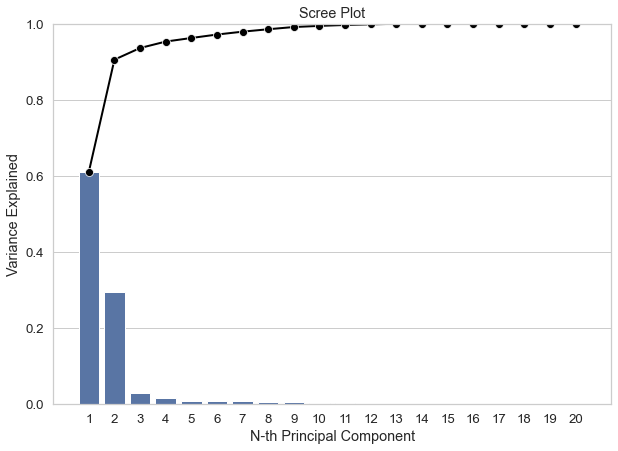

In [ ]:
# Hagamos una gráfica para representarlo y determinar el número mínimo de componentes:

import seaborn as sns

PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()


Esta gráfica ya nos ayuda a contestar cuáles son los principales componente del dataset.

Son: 
    
* `given_credit` con un **61.01%** del total de varianza y 
* `age` que aporta un total de **29.51%** 

### **Paso 2:**
    - Interprete cada componente principal en términos de las variables originales
    
    * Examine la magnitud y la dirección de los coeficientes de las variables originales.
    * Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

In [ ]:
# Examinemos los componentes:


pcsSummary.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary.columns) + 1)]
pcsSummary.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
Standard deviation,166585.0753,115824.7017,37256.8166,27747.1030,20698.6823,20278.0072,18520.7019,17040.2350,16294.1101,11615.2249,10413.1020,8786.7540,8197.6489,9.114,2.0623,0.9386,0.7321,0.5963,0.512,0.4186
Proportion of variance,0.6106,0.2952,0.0305,0.0169,0.0094,0.0090,0.0075,0.0064,0.0058,0.0030,0.0024,0.0017,0.0015,0.000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000
Cumulative proportion,0.6106,0.9057,0.9363,0.9532,0.9626,0.9717,0.9792,0.9856,0.9915,0.9944,0.9968,0.9985,1.0000,1.000,1.0000,1.0000,1.0000,1.0000,1.000,1.0000


In [ ]:
# Es necesario identificar magnitudes y direcciones de cada componente para determinar importancia de cada variable 
# en cada componente:

pcsComponents_dfX = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary.columns,
                                index = dfPCA.iloc[:, 0:].columns
                                )

# Redondeo a 4 cifras para una mejor lectura
pcsComponents_dfX.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
given_credit,0.4911,0.8693,-0.0206,-0.0184,-0.0441,0.0169,-0.0011,0.0010,0.0095,0.0038,0.0058,0.0000,0.0019,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000
age,0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,1.0000,0.0049,0.0011,0.0002,-0.0003,-0.0000,-0.0005
sep05_repayment,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0007,0.3273,-0.6285,-0.6308,0.2801,-0.1439,-0.0280
aug05_repayment,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0017,0.4158,-0.4361,0.2838,-0.5808,0.4548,0.1104
jul05_repayment,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0023,0.4421,-0.1177,0.5643,0.1453,-0.6224,-0.2526
jun05_repayment,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0020,0.4421,0.2326,0.1548,0.5754,0.3266,0.5374
may05_repayment,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0027,0.4179,0.3883,-0.1965,0.0471,0.3470,-0.7165
abr05_repayment,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0023,0.3930,0.4428,-0.3748,-0.4794,-0.3976,0.3480
sep05_bill_statement,0.3886,-0.2211,-0.5489,-0.2049,0.3169,0.0026,-0.4563,0.0073,0.0703,0.1727,-0.2674,-0.2046,-0.0059,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000
aug05_bill_statement,0.3815,-0.2262,-0.3910,-0.0378,0.0115,-0.0805,0.5269,-0.0660,0.0993,0.0079,0.3511,0.4765,0.0160,0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000


Con esta tabla podemos interpretar fácilmente lo siguiente:

- El primer componente principal (PC1) está dominado por dos variables `given_credit` con una magnitud positiva de 0.4911 y por `sep05_bill_statement` con un peso de **0.3886**

- El segundo componente está completamente dominado por la variable `given_credit` con un peso de **0.8693**

- No estoy agregando el PC3 debido a su poca aportación al total de varianza acumulada: **3.05**

### **Paso 3:**
    - Identifique valores atípicos
    
    - Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. 
    - Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

In [ ]:
# Para este cometido utilizaré el dataframe generado : pcsComponents_dfX

pcsComponents_dfX['feature'] = pcsComponents_dfX.index

dfOutLiers=pcsComponents_dfX.reset_index()
dfOutLiers.reset_index(inplace=True)

# Elimino una variable que surgió
dfOutLiers.pop("level_0")
dfOutLiers.pop("index")


# Verifico mi dataframe
dfOutLiers.head()
dfOutLiers.columns


Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20', 'feature'],
      dtype='object')

In [ ]:
# Esta línea es solo cosmética para no hacer scroll down

%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}


<IPython.core.display.Javascript object>

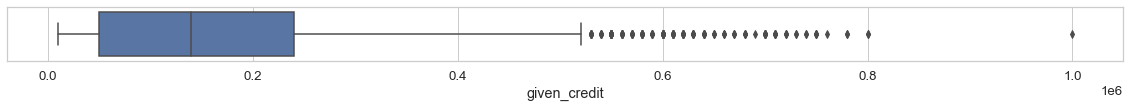

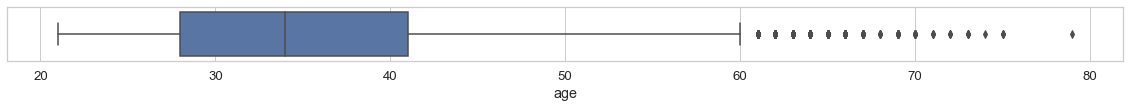

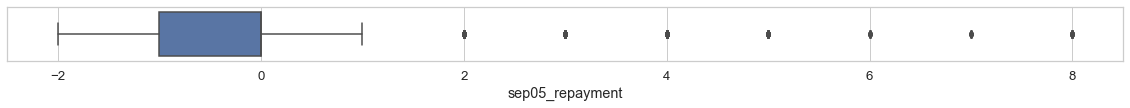

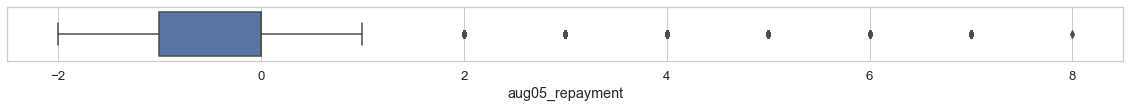

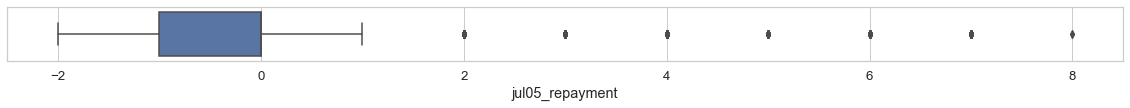

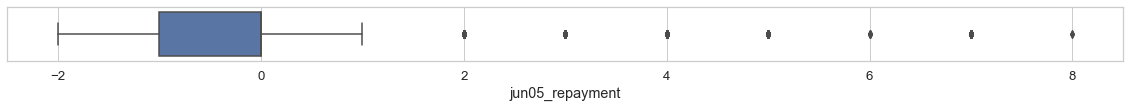

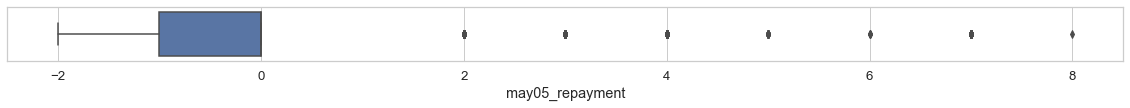

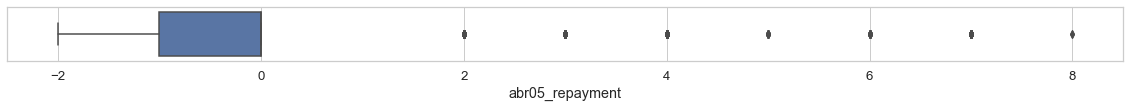

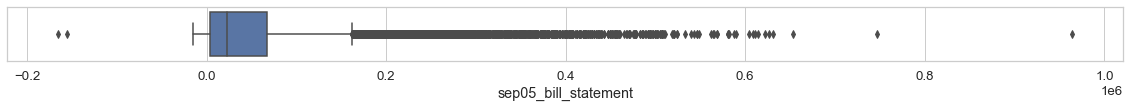

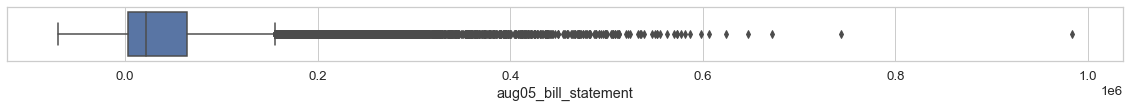

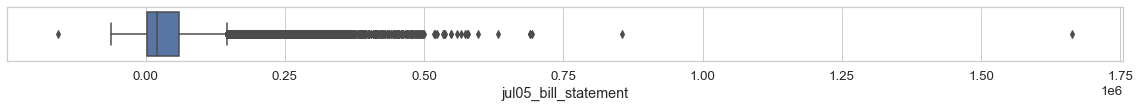

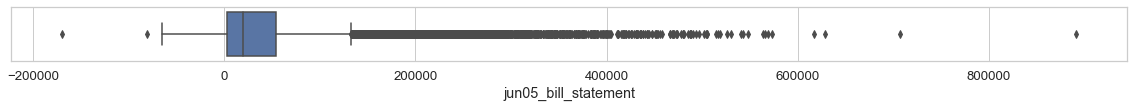

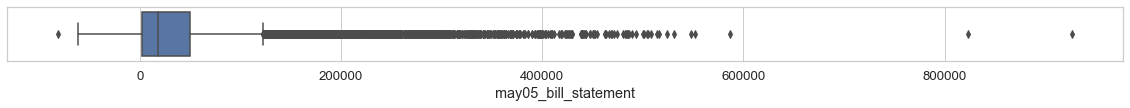

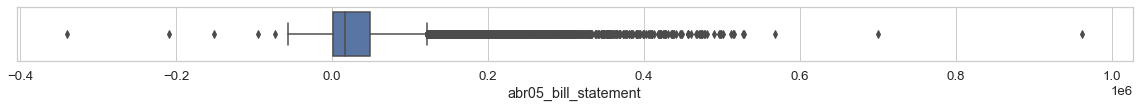

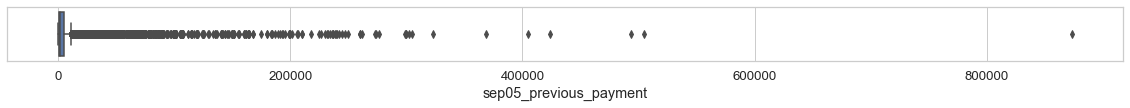

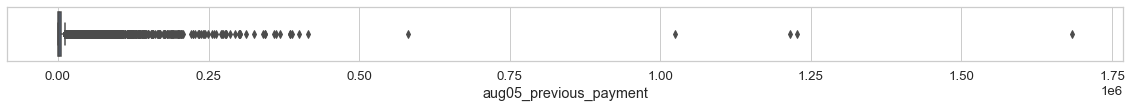

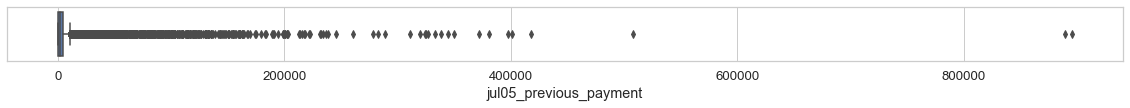

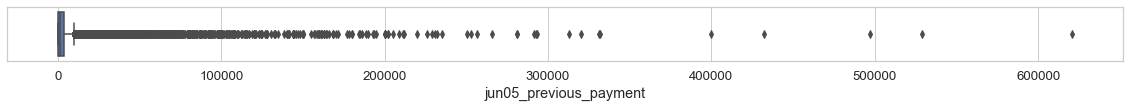

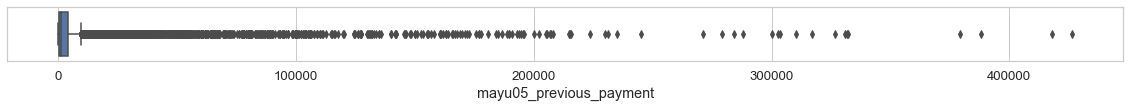

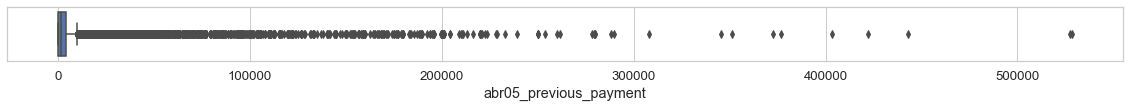

In [ ]:

plt.rcParams["figure.figsize"] = (12,10)


for column in dfPCA:
        plt.figure(figsize=(20,1))
        sns.boxplot(data=dfOriginal, x=column)

Interesante porque podemos encontrar outliers en `given credit`, `age', `sep05_bill_statement`, `aug05_bill_statement', `jun05_bill_statement`, `may05_bill_statement`, y en general en todas las columnas de pago previo

# Parte 2
## Responde las siguientes preguntas en una celda de texto en Jupyter Notebook

- **¿Cuál es el número de componentes mínimo y por qué?**

    Como el análisis de varianza fue posible encontrar que:

    * `z1` aporta el  61.01% del total de varianza y 
    * `z2` aporta un total de 29.51% 

    Esto suma un 90.57% del total de varianza. No es necesario incluir los demás componentes pues tienen una aportación muy baja.


    Significa pues que si removemos el PC2 tendríamos aún 61.01% de varianza. Este componente corresponde al crédito ortorgado.
    
    Estos componentes son:
        - given_credit
        - age

<br>

- **¿Cuál es la variación de los datos que representan esos componentes?**

    Con el cálculo de varianza se pudo calcular que:
     * `z1` aporta el  61.01% del total de varianza y 
     * `z2` aporta un total de 29.51% 
     
<br>

- **¿Cuál es la pérdida de información después de realizar PCA?**
    
    Podemos quedarnos con el 90.57% de la información y perder 9.43%
<br>

- **De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?**

    Después de calcular el peso de cada variable para cada componente principal pude calcular que:

    - El primer componente principal (PC1) está dominado por dos variables `given_credit` con una magnitud positiva de 0.4911 y por `sep05_bill_statement` con un peso de **0.3886**

    - El segundo componente está completamente dominado por la variable `given_credit` con un peso de **0.8693**

    - No estoy agregando el PC3 debido a su poca aportación al total de varianza acumulada: **3.05**
<br>

- **¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**

    La reducción de dimensionalidad es una técnica necesaria cuando tenemos un número alto de características en nuestro dataset. Además de tener un nivel alto de correlación entre diferentes variables, eso lo podemos conocer como multicolinealidad. PCA aplica un principio de parsimonia donde obtenemos el máximo de información con el mínimo de características. 
    
    Como beneficios principales, nos ofrece la reduccion de la matriz del dataset reteniendo la máxima información posible, esto deriva en lo siguiente:
    - Entendimiento más sencillo de las variables que aportan información al modelo.
    - Reducción de procesamiento pues tendremos matrices más pequeñas.
    - Naturalmente ayuda a reducir el overfitting pues nuestro modelo tomará solamente las variables necesarias.